In [ ]:
#Attack1 (adding random noise)

In [1]:
from PIL import Image
import numpy as np
import os
def load_image(image_path):
    return Image.open(image_path)

def perturbation(image, epsilon=0.01):
    image_data = np.array(image)
    noise = np.random.normal(loc=0.0, scale=1.0, size=image_data.shape)
    perturbed_image_data = image_data + epsilon * noise
    perturbed_image_data = np.clip(perturbed_image_data, 0, 255)
    perturbed_image = Image.fromarray(perturbed_image_data.astype('uint8'))
    return perturbed_image

def save_image(image, path):
    image.save(path)

#example
image_path = "/content/img/3.tiff"
base_name = os.path.basename(image_path)
file_name, file_extension = os.path.splitext(base_name)
adversarial_image_path = "/content/img/{}_A1.tiff".format(file_name)
original_image = load_image(image_path)
adversarial_image = perturbation(original_image)
save_image(adversarial_image, adversarial_image_path)


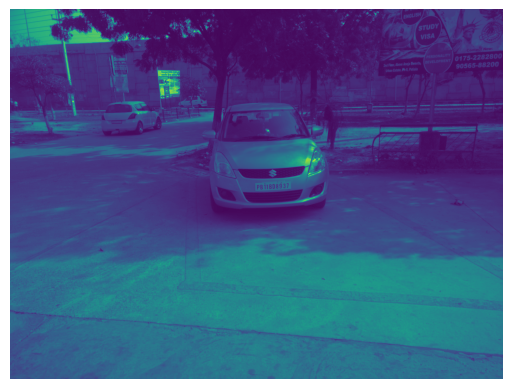

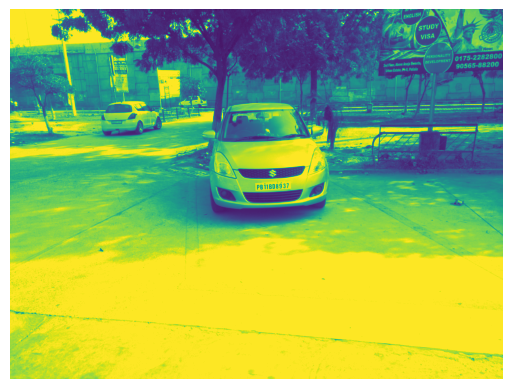

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = "./img/3.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


image_path = "/content/img/3_A1.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
#Attack2 (Image scaling)

In [3]:
import numpy as np
from PIL import Image

def scaling_attack(input_image_path, scale_factor=0.1):
    original_image = Image.open(input_image_path)
    original_image = original_image.convert('RGB')

    width, height = original_image.size
    pattern = np.array(original_image)

    for y in range(height):
        for x in range(width):
            if (x // 10 + y // 10) % 2 == 0:
                pattern[y, x] = [0, 255, 0]

    manipulated_image = Image.fromarray(pattern)
    base_name = os.path.basename(input_image_path)
    file_name, file_extension = os.path.splitext(base_name)
    adversarial_image_path = "/content/img/{}_A2.tiff".format(file_name)
    manipulated_image.save(adversarial_image_path, 'TIFF')

scaling_attack('/content/img/3.tiff')


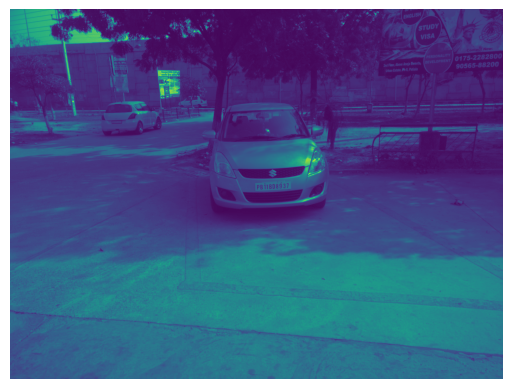

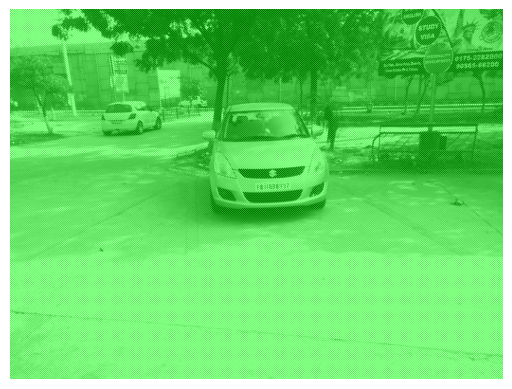

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = "./img/3.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


image_path = "/content/img/3_A2.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [6]:
#Attack3 (FGSM -1)

In [5]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
from torchvision.models import resnet18

model = resnet18(pretrained=True)
model.eval()

def load_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])

    image = Image.open(image_path).convert("RGB")

    image = transform(image).unsqueeze(0)

    return image

def fgsm_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image + epsilon * sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image
#example


image_path = "/content/img/3.tiff"
base_name = os.path.basename(image_path)
file_name, file_extension = os.path.splitext(base_name)
adversarial_image_path = "/content/img/{}_A3.tiff".format(file_name)
image = load_image(image_path)

image.requires_grad = True

output = model(image)

label = torch.tensor([3])
loss_func = nn.CrossEntropyLoss()

loss = loss_func(output, label)

model.zero_grad()
loss.backward()

data_grad = image.grad.data

epsilon = 0.01
perturbed_image = fgsm_attack(image, epsilon, data_grad)
transform = transforms.ToPILImage()
perturbed_image_pil = transform(perturbed_image.squeeze())

perturbed_image_pil.save(adversarial_image_path)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


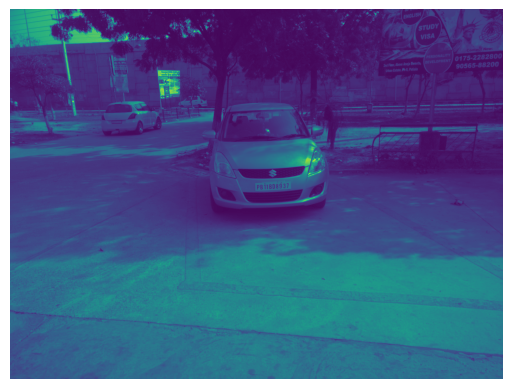

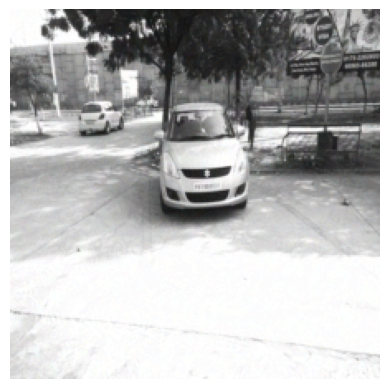

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = "./img/3.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


image_path = "/content/img/3_A3.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
#Attack4 (FGSM2 -2)

In [7]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
from torchvision.models import resnet18

model = resnet18(pretrained=True)
model.eval()

def load_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    image = Image.open(image_path)
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)
    return image

def fgsm_targeted_attack(image, epsilon, data_grad):
    sign_data_grad = data_grad.sign()
    perturbed_image = image - epsilon * sign_data_grad
    perturbed_image = torch.clamp(perturbed_image, 0, 1)
    return perturbed_image
#example

image_path = "/content/img/3.tiff"
base_name = os.path.basename(image_path)
file_name, file_extension = os.path.splitext(base_name)
adversarial_image_path = "/content/img/{}_A4.tiff".format(file_name)
image = load_image(image_path)

image.requires_grad = True

output = model(image)

target = torch.tensor([555])
loss_func = nn.CrossEntropyLoss()

loss = loss_func(output, target)

model.zero_grad()
loss.backward()

data_grad = image.grad.data

epsilon = 0.01
perturbed_image = fgsm_targeted_attack(image, epsilon, data_grad)

transform = transforms.ToPILImage()
perturbed_image_pil = transform(perturbed_image.squeeze())
perturbed_image_pil.save(adversarial_image_path)


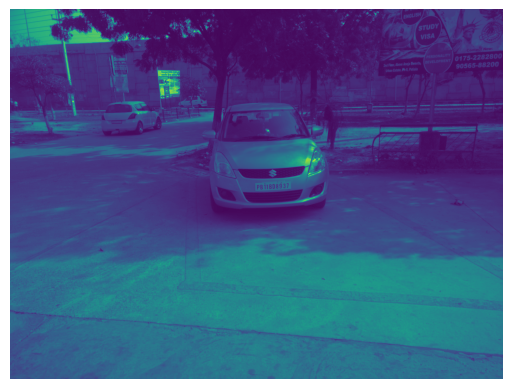

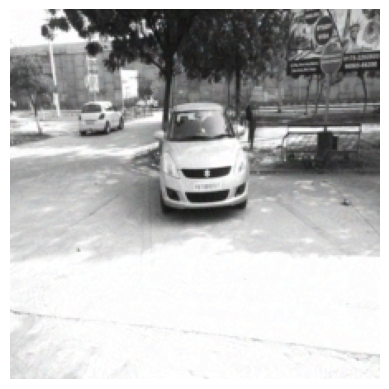

In [8]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = "./img/3.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


image_path = "/content/img/3_A4.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
#Attack 5 (PGD)

In [9]:
import torch
import torch.nn.functional as F
import torchvision.transforms as transforms
from PIL import Image
from torchvision.models import resnet18

class PGD:
    def __init__(self, model, config, target=None):
        self.model = model
        self.config = config
        self.target = target

    def forward(self, x, y):
        x_adv = x.detach().clone()
        if self.config['random_init']:
            x_adv = self._random_init(x_adv)
        for _ in range(self.config['attack_steps']):
            x_adv.requires_grad = True
            self.model.zero_grad()
            logits = self.model(x_adv)
            if self.target is None:
                loss = F.cross_entropy(logits, y, reduction="sum")
            else:
                assert self.target.size() == y.size()
                loss = F.cross_entropy(logits, self.target)

            loss.backward()
            grad = x_adv.grad.detach()
            grad = grad.sign()
            step_size = self.config['attack_lr'] * grad
            x_adv = x_adv + step_size if self.target is None else x_adv - step_size

            x_adv = x + torch.clamp(x_adv - x, min=-self.config['eps'], max=self.config['eps'])
            x_adv = x_adv.detach()
            x_adv = torch.clamp(x_adv, 0, 1)

        return x_adv

    def _random_init(self, x_adv):
        x_adv = x_adv + torch.empty_like(x_adv).uniform_(-self.config['eps'], self.config['eps'])
        return x_adv

model = resnet18(pretrained=True)
model.eval()

def load_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
    ])
    image = Image.open(image_path)
    image = Image.open(image_path).convert("RGB")
    image = transform(image).unsqueeze(0)
    return image
#example


image_path = "/content/img/3.tiff"
base_name = os.path.basename(image_path)
file_name, file_extension = os.path.splitext(base_name)
adversarial_image_path = "/content/img/{}_A5.tiff".format(file_name)
image = load_image(image_path)


label = torch.tensor([3])

config = {
    'eps': 0.03,
    'attack_lr': 0.01,
    'attack_steps': 40,
    'random_init': True
}

pgd_attacker = PGD(model, config)
adversarial_image = pgd_attacker.forward(image, label)

transform = transforms.ToPILImage()
adversarial_image_pil = transform(adversarial_image.squeeze())
adversarial_image_pil.save(adversarial_image_path)



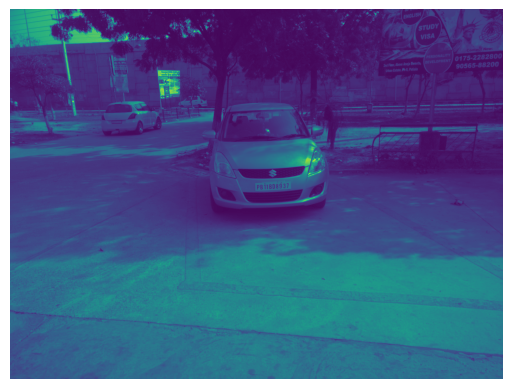

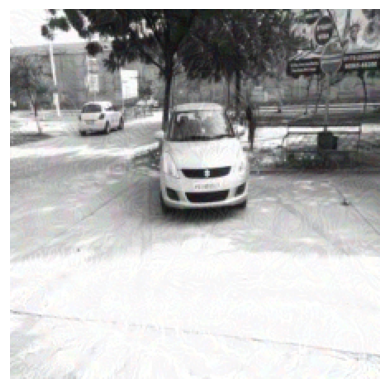

In [10]:
import matplotlib.pyplot as plt
from PIL import Image

image_path = "./img/3.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

image_path = "/content/img/3_A5.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
#Attack6 (Blinding)

In [11]:
from PIL import Image, ImageEnhance, ImageDraw

def simulate_blinding_attack(image_path, output_path):
    image = Image.open(image_path).convert("RGB")

    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(3.0)


    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(2.5)


    draw = ImageDraw.Draw(image)
    width, height = image.size
    radius = min(width, height) // 10
    center = (width // 2, height // 4)
    draw.ellipse([center[0] - radius, center[1] - radius, center[0] + radius, center[1] + radius], fill=(255, 255, 224))

    image.save(output_path)


In [12]:
#steps to run
simulate_blinding_attack("./img/3.tiff", '/content/A6_1.tiff')


In [13]:
from PIL import Image, ImageEnhance, ImageDraw

def simulate_blinding_attack(image_path, output_path):
    image = Image.open(image_path).convert("RGB")

    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(3.0)


    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(2.5)


    draw = ImageDraw.Draw(image)
    width, height = image.size
    radius = min(width, height) // 5
    center = (width // 2, height // 4)
    draw.ellipse([center[0] - radius, center[1] - radius, center[0] + radius, center[1] + radius], fill=(255, 255, 224))

    image.save(output_path)
simulate_blinding_attack("./img/3.tiff", '/content/A6_2.tiff')


In [14]:
from PIL import Image, ImageEnhance, ImageDraw

def simulate_blinding_attack(image_path, output_path):
    image = Image.open(image_path).convert("RGB")

    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(5.0)


    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(2.5)


    draw = ImageDraw.Draw(image)
    width, height = image.size
    radius = min(width, height) // 10
    center = (width // 2, height // 4)
    draw.ellipse([center[0] - radius, center[1] - radius, center[0] + radius, center[1] + radius], fill=(255, 255, 224))

    image.save(output_path)
image_path = "/content/img/3.tiff"
base_name = os.path.basename(image_path)
file_name, file_extension = os.path.splitext(base_name)
adversarial_image_path = "/content/img/{}_A6.tiff".format(file_name)
image = load_image(image_path)
simulate_blinding_attack(image_path,adversarial_image_path)


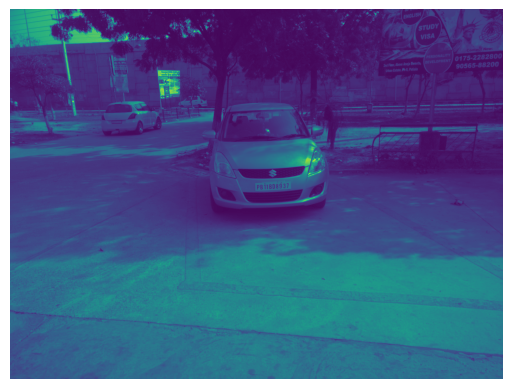

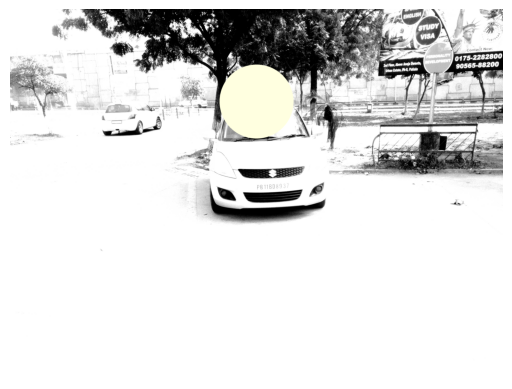

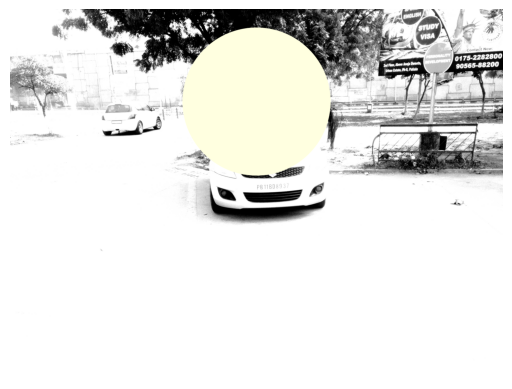

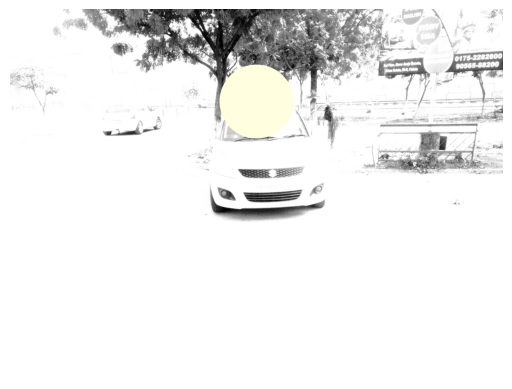

In [15]:
import matplotlib.pyplot as plt
from PIL import Image


image_path = "./img/3.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


image_path = "/content/A6_1.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


image_path = "/content/A6_2.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()


image_path = "/content/img/3_A6.tiff"
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

In [16]:
!pip install rasterio

In [17]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt comet_ml

import torch
import utils
display = utils.notebook_init()

YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu118 CPU


Setup complete ✅ (8 CPUs, 51.0 GB RAM, 27.5/225.8 GB disk)


In [19]:
from PIL import Image
import torch
import numpy as np
import os

def calculate_iou(box1, box2):
    x_min = max(box1[0], box2[0])
    y_min = max(box1[1], box2[1])
    x_max = min(box1[2], box2[2])
    y_max = min(box1[3], box2[3])
    intersection_area = max(0, x_max - x_min) * max(0, y_max - y_min)
    box1_area = (box1[2] - box1[0]+1) * (box1[3] - box1[1]+1)
    box2_area = (box2[2] - box2[0]+1) * (box2[3] - box2[1]+1)
    union_area = float(box1_area + box2_area - intersection_area)
    iou = intersection_area / union_area
    return iou

model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

directory = '/content/img'
file_paths = [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith('.tiff')]

original_image_name = '3.tiff'
original_image_path = os.path.join(directory, original_image_name)
attacked_image_paths = [path for path in file_paths if path != original_image_path]

bounding_boxes = {}

def process_image(file_path):
    image = Image.open(file_path)
    if image.mode != 'RGB':
        image = image.convert('RGB')
    results = model(image)
    bboxes = results.xyxy[0].cpu().numpy()
    bounding_boxes[file_path] = bboxes

process_image(original_image_path)

for file_path in attacked_image_paths:
    process_image(file_path)

iou_scores = {}
for attacked_image_path in attacked_image_paths:
    attacked_bboxes = bounding_boxes[attacked_image_path]
    max_iou_per_attacked_box = []
    for ab in attacked_bboxes:
        max_iou = 0
        for ob in bounding_boxes[original_image_path]:
            iou = calculate_iou(ob[:4], ab[:4])
            max_iou = max(max_iou, iou)
        max_iou_per_attacked_box.append(max_iou)
    iou_scores[attacked_image_path] = max_iou_per_attacked_box

for path, scores in iou_scores.items():
    print(f'IOU for each bounding box in {os.path.basename(path)}: {scores}')


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-249-gf400bba Python-3.10.12 torch-2.1.0+cu118 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


IOU for each bounding box in 3_A2.tiff: [0.6441351101289747]
IOU for each bounding box in 3_A3.tiff: [0, 0, 0]
IOU for each bounding box in 3_A1.tiff: [0.9955520893248346, 0.9898850351730513, 0.9922093532687167, 0.9808960508511806, 0.9507667908280688]
IOU for each bounding box in 3_A4.tiff: [0, 0, 0]
IOU for each bounding box in 3_A6.tiff: [0.790302757137511]
IOU for each bounding box in 3_A5.tiff: [0, 0, 0]
